## Edit variables

In [1]:

path = "C:/Users/aniss/Desktop/crpt/RESULTAT_TRIX"
pairName = "ARUSDT"
startDate = "2017-01-01"
endDate = "2022-06-20" # une date ou  ""
timeInterval = '1h'


# parametre pour le backTest
trixLength =9
trixSignal =22
ema200 =200
stochTop =0.8
stochBottom =0.2
stoch_rsi =14

# Plage des paramettres pour le OPTIMIZER  des paramettres 
stochTop_plage = [85,90,1]
stochBottom_plage = [25,30,1]
stoch_rsi_plage = [12,16,1]
trixLength_plage = [9,11,1]
trixSignal_plage = [20,25,1]

## <h1>Load yours data</h1>

In [2]:
# -- Import --
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time
from math import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# -- Define Binance Client --
client = Client()




# -- Load all price data from binance API --
klinesT = client.get_historical_klines(pairName, timeInterval, startDate)

# -- Define your dataset --
df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time',
                                      'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

# -- Set the date to index --
df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']

print("Data loaded 100%")

# -- Uncomment the line below if you want to check your price dataset --
df.shape

Data loaded 100%


(14975, 11)

## <h1>Define your indicators</h1>

In [3]:
# -- Drop all columns we do not need --
df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)

# -- Indicators, you can edit every value --
df['EMA200'] = ta.trend.ema_indicator(close=df['close'], window=ema200)

# -- Trix Indicator --
df['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=df['close'], window=trixLength), window=trixLength), window=trixLength)
df['TRIX_PCT'] = df["TRIX"].pct_change()*100
df['TRIX_SIGNAL'] = ta.trend.sma_indicator(df['TRIX_PCT'],trixSignal)
df['TRIX_HISTO'] = df['TRIX_PCT'] - df['TRIX_SIGNAL']

# -- Stochasitc RSI --
df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=stoch_rsi, smooth1=3, smooth2=3)
print("Indicators loaded 100%")
# -- Uncomment the line below if you want to check your dataset with indicators --
df

Indicators loaded 100%


/tmp/ipykernel_96776/3838381714.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)


,open,high,low,close,volume,EMA200,TRIX,TRIX_PCT,TRIX_SIGNAL,TRIX_HISTO,STOCH_RSI
timestamp,,,,,,,,,,,
2021-05-14 12:00:00,27.180,77.800,27.180,35.941,1271833.70000000,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-14 13:00:00,35.998,36.900,32.500,32.851,173171.31000000,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-14 14:00:00,32.951,34.000,31.786,33.265,132901.00000000,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-14 15:00:00,33.262,33.812,32.000,32.272,99797.73000000,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-14 16:00:00,32.272,32.351,30.201,30.575,106515.75000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-28 12:00:00,10.180,10.180,10.080,10.120,28960.76000000,9.839492,10.286899,0.047503,0.119190,-0.071687,0.000000
2023-01-28 13:00:00,10.110,10.110,9.870,10.000,102790.85000000,9.841089,10.286800,-0.000960,0.120433,-0.121393,0.000000
2023-01-28 14:00:00,10.000,10.020,9.910,9.920,29306.68000000,9.841874,10.281226,-0.054188,0.118681,-0.172870,0.000000


## <h1>RUN the Spot Backtest</h1>

In [42]:
dfTest = None
# dfTest = df.copy()

if endDate == "" :
  endDate=None

# -- Ifyou want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[startDate : endDate]

# -- Definition of dt, that will be the dataset to do your trades analyses --
dt = None
dt = pd.DataFrame(columns = ['date','position', 'reason', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

# -- You can change variables below --
usdt = 1000
makerFee = 0.0002
takerFee = 0.0007

# -- Do not touch these values --
initalWallet = usdt
wallet = usdt
coin = 0
lastAth = 0
previousRow = dfTest.iloc[0]
stopLoss = 0
takeProfit = 500000
buyReady = True
sellReady = True

# -- Condition to BUY market --
def buyCondition(row, previousRow):
    if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < stochTop:
        return True
    else:
        return False

# -- Condition to SELL market --  
def sellCondition(row, previousRow):
    if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > stochBottom:
        return True
    else:
        return False

# -- Iteration on all your price dataset (df) --
for index, row in dfTest.iterrows():
  # -- Buy market order --
  if buyCondition(row, previousRow) and usdt > 0 and buyReady == True:
    # -- You can define here at what price you buy --
    buyPrice = row['close']

    # -- Define the price of you SL and TP or comment it if you don't want a SL or TP --
    # stopLoss = buyPrice - 0.02 * buyPrice
    # takeProfit = buyPrice + 0.04 * buyPrice

    coin = usdt / buyPrice
    fee = takerFee * coin
    coin = coin - fee
    usdt = 0
    wallet = coin * row['close']

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --
    # print("Buy COIN at",buyPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index, 'position': "Buy", 'reason':'Buy Market Order','price': buyPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  # -- Stop Loss --
    elif row['low'] < stopLoss and coin > 0:
        sellPrice = stopLoss
        usdt = coin * sellPrice
        fee = makerFee * usdt
        usdt = usdt - fee
        coin = 0
        buyReady = False
        wallet = usdt

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet
      
    # -- You can uncomment the line below if you want to see logs --
    # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index,'position': "Sell", 'reason':'Sell Stop Loss','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)    

  # -- Sell Market Order --
    elif sellCondition(row, previousRow) and coin > 0 and sellReady == True:

    # -- You can define here at what price you buy --
        sellPrice = row['close']
        usdt = coin * sellPrice
        fee = takerFee * usdt
        usdt = usdt - fee
        coin = 0
        buyReady = True
        wallet = usdt

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --  
    # print("Sell COIN at",sellPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index,'position': "Sell", 'reason':'Sell Market Order','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  previousRow = row

# -- BackTest Analyses --
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPercentage = ((lastClose - iniClose)/iniClose) * 100
algoPercentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPercentage = ((algoPercentage - holdPercentage)/holdPercentage) * 100

try:
    tradesPerformance = round(dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].sum()
            / dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].count(), 2)
except:
    tradesPerformance = 0
    print("/!\ There is no Good or Bad Trades in your BackTest, maybe a problem...")

try:
    totalGoodTrades = dt.groupby('tradeIs')['date'].nunique()['Good']
    AveragePercentagePositivTrades = round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(), 2)
    idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
    bestTrade = str(
        round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(), 2))
except:
    totalGoodTrades = 0
    AveragePercentagePositivTrades = 0
    idbest = ''
    bestTrade = 0
    print("/!\ There is no Good Trades in your BackTest, maybe a problem...")

try:
    totalBadTrades = dt.groupby('tradeIs')['date'].nunique()['Bad']
    AveragePercentageNegativTrades = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(), 2)
    idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
    worstTrade = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(), 2)
except:
    totalBadTrades = 0
    AveragePercentageNegativTrades = 0
    idworst = ''
    worstTrade = 0
    print("/!\ There is no Bad Trades in your BackTest, maybe a problem...")

totalTrades = totalBadTrades + totalGoodTrades
winRateRatio = (totalGoodTrades/totalTrades) * 100

reasons = dt['reason'].unique()

dt

C:\Users\aniss\AppData\Local\Temp\ipykernel_22924\267498519.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
C:\Users\aniss\AppData\Local\Temp\ipykernel_22924\267498519.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
C:\Users\aniss\AppData\Local\Temp\ipykernel_22924\267498519.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
C:\Users\aniss\AppData\Local\Temp\ipykernel_22924\267498519.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
C:\Users\aniss\AppData\Local\T

,date,position,reason,price,frais,fiat,coins,wallet,drawBack,resultat,resultat%,tradeIs
date,,,,,,,,,,,,
2021-05-16 11:00:00,2021-05-16 11:00:00,Buy,Buy Market Order,26.749,0.026169,0,37.358406,999.3,0.0,None,NaN,
2021-05-16 21:00:00,2021-05-16 21:00:00,Sell,Sell Market Order,24.122,0.630812,900.528656,0,900.528656,-0.098841,-98.771344,-9.884053,Bad
2021-05-17 14:00:00,2021-05-17 14:00:00,Buy,Buy Market Order,22.501,0.028015,0,39.993702,899.898286,-0.099471,None,NaN,
2021-05-18 16:00:00,2021-05-18 16:00:00,Sell,Sell Market Order,23.11,0.646978,923.607472,0,923.607472,-0.075746,23.709186,2.634652,Good
2021-05-19 23:00:00,2021-05-19 23:00:00,Buy,Buy Market Order,16.479,0.039233,0,56.00831,922.960947,-0.076393,None,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-17 13:00:00,2022-06-17 13:00:00,Sell,Sell Market Order,8.86,0.697839,996.214406,0,996.214406,-0.602033,-1.823022,-0.182661,Bad
2022-06-18 15:00:00,2022-06-18 15:00:00,Buy,Buy Market Order,7.67,0.090919,0,129.793619,995.517056,-0.602311,None,NaN,
2022-06-20 04:00:00,2022-06-20 04:00:00,Sell,Sell Market Order,8.46,0.768638,1097.285377,0,1097.285377,-0.561657,101.768321,10.222660,Good


<h1>Print Complete BackTest Analyses</h1>

In [43]:
print("Pair Symbol :",pairName)
print("Period : [" + str(dfTest.index[0]) + "] -> [" +
      str(dfTest.index[len(dfTest)-1]) + "]")
print("Starting balance :", initalWallet, "$")

print("\n----- General Informations -----")
print("Final balance :", round(wallet, 2), "$")
print("Performance vs US Dollar :", round(algoPercentage, 2), "%")
print("Buy and Hold Performence :", round(holdPercentage, 2), "%")
print("Performance vs Buy and Hold :", round(vsHoldPercentage, 2), "%")
print("Best trade : ",bestTrade, "%, the", idbest)
print("Worst trade :", worstTrade, "%, the", idworst)
print("Worst drawBack :", str(100*round(dt['drawBack'].min(), 2)), "%")
print("Total fees : ", round(dt['frais'].sum(), 2), "$")

print("\n----- Trades Informations -----")
print("Total trades on period :",totalTrades)
print("Number of positive trades :", totalGoodTrades)
print("Number of negative trades : ", totalBadTrades)
print("Trades win rate ratio :", round(winRateRatio, 2), '%')
print("Average trades performance :",tradesPerformance,"%")
print("Average positive trades :", AveragePercentagePositivTrades, "%")
print("Average negative trades :", AveragePercentageNegativTrades, "%")

print("\n----- Trades Reasons -----")
reasons = dt['reason'].unique()
for r in reasons:
    print(r+" number :", dt.groupby('reason')['date'].nunique()[r])

Pair Symbol : ARUSDT
Period : [2021-05-14 12:00:00] -> [2022-06-20 23:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 1102.93 $
Performance vs US Dollar : 10.29 %
Buy and Hold Performence : -72.9 %
Performance vs Buy and Hold : -114.12 %
Best trade :  59.25 %, the 2021-08-28 12:00:00
Worst trade : -14.2 %, the 2021-06-23 20:00:00
Worst drawBack : -64.0 %
Total fees :  281.33 $

----- Trades Informations -----
Total trades on period : 251
Number of positive trades : 104
Number of negative trades :  147
Trades win rate ratio : 41.43 %
Average trades performance : 0.45 %
Average positive trades : 7.39 %
Average negative trades : -4.46 %

----- Trades Reasons -----
Buy Market Order number : 251
Sell Market Order number : 251


## <h1>Plot to improve ...</h1>


----- Plot -----


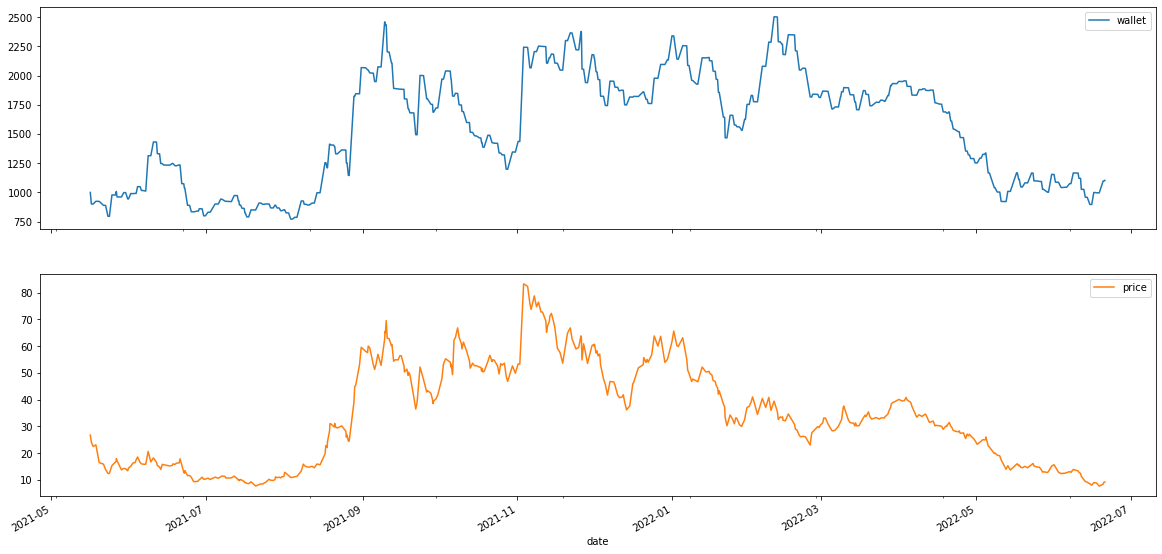

In [44]:
dt[['wallet', 'price']].plot(subplots=True, figsize=(20, 10))
print("\n----- Plot -----")

## Optimisation 5 paramettres

In [45]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'param3', 'param4', 'param5', 'result'])

# dfTest = df.copy()

if endDate == "" :
  endDate=None

# -- Ifyou want to run your BackTest on a specific period, uncomment the line below --
dfTest = df[startDate : endDate]


# -- Condition to BUY market --
def buyCondition(row, param):
  if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < param:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row, param):
  if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > param:
    return True
  else:
    return False




loopI = stochTop_plage   # stochTop
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

loopJ = stochBottom_plage # stochBottom 
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

loopK = stoch_rsi_plage# stoch_rsi
enumK = ceil((loopK[1] - loopK[0]) / loopK[2])


loopL = trixLength_plage# trixLength
enumL = ceil((loopL[1] - loopL[0]) / loopL[2])

loopM = trixSignal_plage # trixSignal
enumM = ceil((loopM[1] - loopM[0]) / loopM[2])





# trixLength  = l
# trixSignal = m
# stoch_rsi = k
# stochTop = i
# stochBottom = j 

count = 0
maxCount = enumI * enumJ * enumK * enumL * enumM
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    for k in range(loopK[0], loopK[1], loopK[2]):
      for l in range(loopL[0], loopL[1], loopL[2]):
        for m in range(loopM[0], loopM[1], loopM[2]):
          clear_output(wait=True)
          count += 1
          print("Loading...",count,'/',maxCount)
          # -- You can change variables below --
          usdt = 1000
          coin = 0

          trixLength = l
          trixSignal = m
          dfTest['STOCH_RSI'] = ta.momentum.stochrsi(close=dfTest['close'], window=k, smooth1=3, smooth2=3)

          # -- Trix Indicator --#####################################################################
          
          dfTest['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=df['close'], window=trixLength),
                                                           window=trixLength),
                                                           window=trixLength)
          df['TRIX_PCT'] = df["TRIX"].pct_change()*100
          dfTest['TRIX_SIGNAL'] = ta.trend.sma_indicator(df['TRIX_PCT'],trixSignal)
          dfTest['TRIX_HISTO'] = df['TRIX_PCT'] - df['TRIX_SIGNAL']


          # -- Stochasitc RSI ----###################################################################
          
          dfTest['STOCH_TOP'] = i
          dfTest['STOCH_BOTTOM'] = j


          ####################################################################
          for index, row in dfTest.iterrows():
            #BUY
            if buyCondition(row, i/100) and usdt > 0:
              coin = (usdt/dfTest['close'][index]) - 0.0007*(usdt/dfTest['close'][index])
              usdt = 0

            #SELL
            elif sellCondition(row, j/100) and coin > 0:
              usdt = coin*dfTest['close'][index] - (0.0007*coin*dfTest['close'][index])
              coin = 0

          myrow = {'param1': i, 'param2': j, 'param3': k, 'param4': l, 'param5': m, 'result': coin*dfTest.iloc[len(dfTest)-1]['close'] + usdt}
          dt = dt.append(myrow,ignore_index=True)   


dict_rest = {"param4" : "trixLength",
"param5" : "trixSignal",
"param3" : "stoch_rsi",  
"param1" : "stochTop",  
"param2" : "stochBottom"
}

dt_named = dt.rename(columns=dict_rest).sort_values(by=['result'])
dt_named



print(dt_named)

C:\Users\aniss\AppData\Local\Temp\ipykernel_22924\3663104296.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['STOCH_RSI'] = ta.momentum.stochrsi(close=dfTest['close'], window=k, smooth1=3, smooth2=3)
C:\Users\aniss\AppData\Local\Temp\ipykernel_22924\3663104296.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=df['close'], window=trixLength),
C:\Users\aniss\AppData\Local\Temp\ipykernel_22924\3663104296.

Loading... 259 / 1000


KeyboardInterrupt: 

## Sauvegarde des résultas

In [ ]:
# Changer les noms de fichier a chaque test  
result_file_name =  "resultETH15012022_26022022.csv"
input_file_name = "entreeETH15012022_26022022.csv"
dt_named.to_csv(path+'/'+result_file_name)
dfTest.to_csv(path+'/'+ input_file_name)

OSError: Cannot save file into a non-existent directory: 'C:\Users\aniss\Desktop\crpt\RESULTAT_TRIX'